In [1]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00


In [9]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [3]:
!pip install pylatexenc

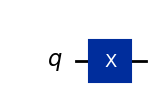

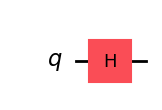

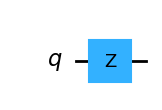

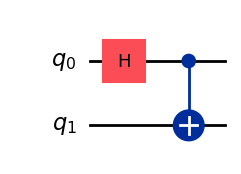

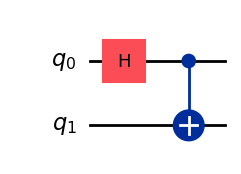

statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


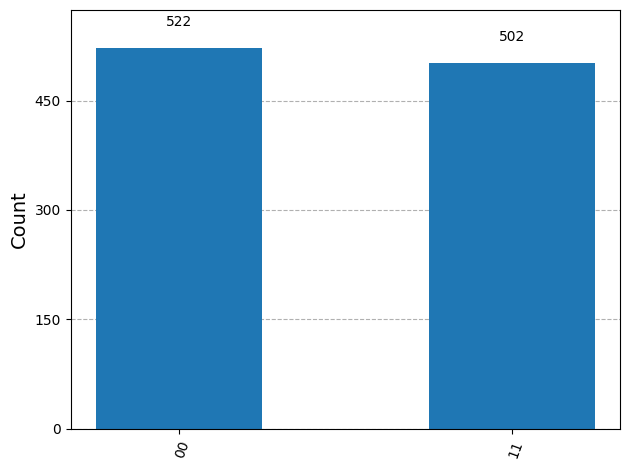

In [10]:
# X gate
%matplotlib inline
qc_x=QuantumCircuit(1)
qc_x.x(0)
display(qc_x.draw('mpl'))

# H gate : HADAMARD GATE
qc_h=QuantumCircuit(1)
qc_h.h(0)
display(qc_h.draw('mpl'))

# Z gate
qc_z=QuantumCircuit(1)
qc_z.z(0)
display(qc_z.draw('mpl'))

# CNOT gate also called as CX gate
qc_c=QuantumCircuit(2)
qc_c.h(0)
qc_c.cx(0,1)
display(qc_c.draw('mpl'))

# Bell State
qc_bell=QuantumCircuit(2)
qc_bell.h(0)
qc_bell.cx(0,1)
display(qc_bell.draw('mpl'))
sv=Statevector.from_instruction(qc_bell)
print("statevector:",sv)
qc_bell_measurement=qc_bell.copy()
qc_bell_measurement.measure_all()
sim=Aer.get_backend('aer_simulator')
job=sim.run(transpile(qc_bell_measurement,sim),shots=1024)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)